In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy import integrate

In [2]:
def single_MTD(t,t0=0,num_weeks=4,week_length=0.01,decay=500):
    
    tmax0 = t0+num_weeks*week_length
    
    if t<t0:
        return 0
    if t>=tmax0:
        return 0
    for i in range(num_weeks):
        if (t>=t0+i*(week_length))&(t<t0+(i+1)*(week_length))&( (i+1)%4!=0 ):
            return np.exp( decay*(t0+i*(week_length)-t) )
        elif (t>=t0+i*(week_length))&(t<t0+(i+1)*(week_length))&( (i+1)%4==0 ):
            return 0
        
def single_LDM(t,t0=0,num_weeks=5,week_length=0.01,decay=500):
    
    num_days = 12*7
    tmax = t0+num_weeks*week_length
    
    if t<t0:
        return 0
    if t>=tmax:
        return 0
    for i in range(num_days):
        if (t>=t0+i*(week_length/7))&(t<t0+(i+1)*(week_length/7)):
            return 0.3*np.exp( decay*(t0+i*(week_length/7)-t) )

In [3]:
t_vals = np.linspace(-0.02,0.06,10000)
sMTD_vals_list = []
for t in t_vals:
    sMTD_vals_list.append(single_MTD(t))
sMTD_vals = np.array(sMTD_vals_list)

t_vals = np.linspace(-0.02,0.06,10000)
sLDM_vals_list = []
for t in t_vals:
    sLDM_vals_list.append(single_LDM(t))
sLDM_vals = np.array(sLDM_vals_list)

In [4]:
minor_ticks = []
for i in range(83):
    if i*(0.01/7)%0.01!=0:
        minor_ticks.append(i*(0.01/7))

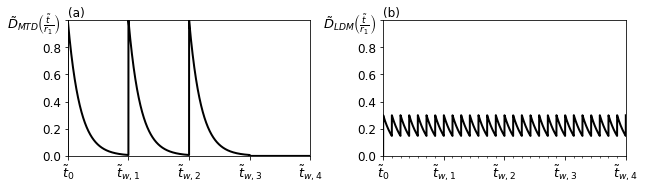

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 2.5))

axs[0].plot(t_vals,sMTD_vals,'k',linewidth=2)
axs[0].set_xlim(0,0.04)
axs[0].set_ylim(0,1)

axs[1].plot(t_vals,sLDM_vals,'k',linewidth=2)
axs[1].set_xlim(0,0.04)
axs[1].set_ylim(0,1)

axs[0].set_xticks([0,0.01,0.02,0.03,0.04])
axs[0].set_xticklabels([r'$\tilde{t}_0$',r'$\tilde{t}_{w,1}$',r'$\tilde{t}_{w,2}$',r'$\tilde{t}_{w,3}$',r'$\tilde{t}_{w,4}$'],fontsize=13)
axs[0].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
axs[0].set_yticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{D}_{MTD}\left(\frac{\tilde{t}}{r_1}\right)$'],fontsize=12)
axs[0].get_yticklabels()[-1].set_fontsize(13)

axs[1].set_xticks([0,0.01,0.02,0.03,0.04])
axs[1].set_xticklabels([r'$\tilde{t}_0$',r'$\tilde{t}_{w,1}$',r'$\tilde{t}_{w,2}$',r'$\tilde{t}_{w,3}$',r'$\tilde{t}_{w,4}$'],fontsize=13)
axs[1].set_xticks(minor_ticks,minor='true')
axs[1].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
axs[1].set_yticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{D}_{LDM}\left(\frac{\tilde{t}}{r_1}\right)$'],fontsize=12)
axs[1].get_yticklabels()[-1].set_fontsize(13)

axs[0].text(0,1.025,'(a)',fontsize=12)
axs[1].text(0,1.025,'(b)',fontsize=12)

axs[1].set_xlim(0,0.04)
axs[1].set_ylim(0,1)

plt.subplots_adjust(wspace=0.3)